In [2]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random


In [3]:

mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])
history=model.fit(x_train,
                  y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7091 - loss: 1.0978 - val_accuracy: 0.9015 - val_loss: 0.3627
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9032 - loss: 0.3506 - val_accuracy: 0.9180 - val_loss: 0.2953
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9156 - loss: 0.2999 - val_accuracy: 0.9249 - val_loss: 0.2649


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9134 - loss: 0.3060
Loss=0.265
Accuracy=0.925


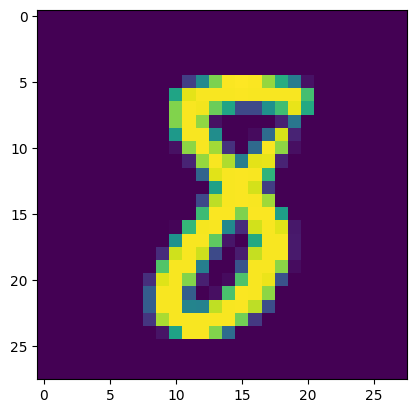

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


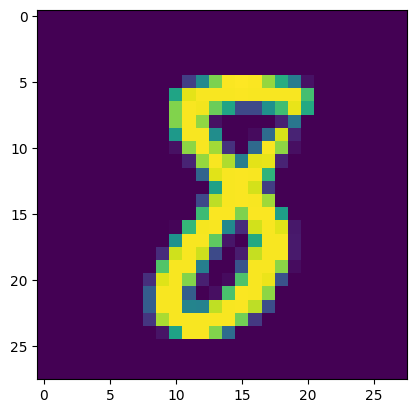

In [7]:

test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [8]:
print('Predicted Value:', predicted_value[n])

Predicted Value: [6.3702530e-05 2.4627310e-03 9.8535260e-03 4.0587984e-02 2.5649593e-05
 1.3367920e-02 7.0412690e-04 7.0156770e-05 9.3255156e-01 3.1243995e-04]


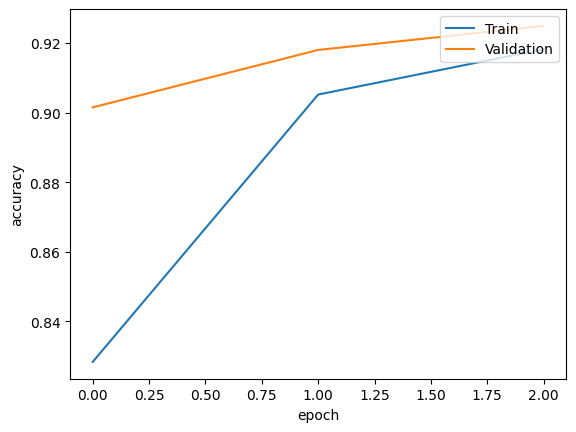

In [9]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

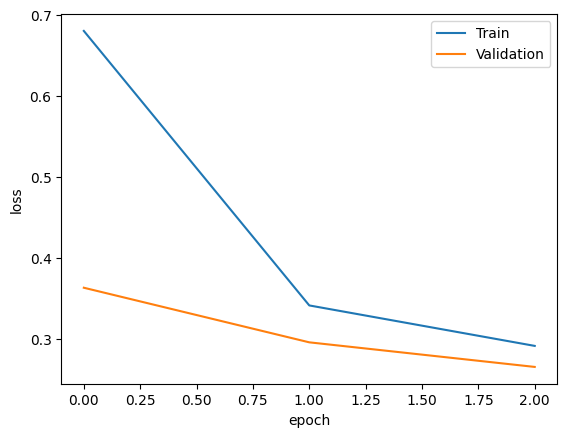

In [10]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()